# 1. Setup

## Các hàm tiền xử lý dữ liệu

In [16]:
#Lowercase
def lowercase(text):
    return text.lower()

def remove_punctuation(text):
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

from underthesea import word_tokenize

def tokenize(text):
    return word_tokenize(text, format="text")

# import urllib
# # Download vietnamese stop words
# data=urllib.request.urlopen('https://raw.githubusercontent.com/stopwords/vietnamese-stopwords/master/vietnamese-stopwords-dash.txt').read()
data = open("vietnamese-stopwords-dash.txt", "r", encoding="utf8").read()

# Read stop words
stopwords= [ x for x in data.splitlines() ]
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stopwords])

import re
def remove_html_url(text):
    return re.sub(r'http\S+', '', text)

In [17]:
import emoji

def remove_emoji(text):
    def get_emoji_regexp():
        # Sort emoji by length to make sure multi-character emojis are
    # matched first
        emojis = sorted(emoji.EMOJI_DATA, key=len, reverse=True)
        pattern = u'(' + u'|'.join(re.escape(u) for u in emojis) + u')'
        return re.compile(pattern)

    exp = get_emoji_regexp()
    return exp.sub(u'', text)

## Demo preprocessing

In [3]:
def preprocess_text(text):
    # '''Input : String, output : String'''
      text_url = remove_html_url(text)
      text_emoji = remove_emoji(text_url)
    
      text_lowercase = lowercase(text_emoji)
      text_punctuation = remove_punctuation(text_lowercase)
      
      text_tokenize = tokenize(text_punctuation)
      text_stopwords = remove_stopwords(text_tokenize)
  
      return text_url, text_emoji, text_lowercase, text_punctuation, text_tokenize, text_stopwords

In [8]:
text = '''
        Cuối cùng thì iPhone 15 Pro https://www.thegioididong.com/dtdd/iphone-15-pro cũng đã chính thức ra mắt vào tháng 09/2023 sau nhiều đồn đoán trong thời gian qua.
        Ở lần ra mắt này Apple mang đến một chiếc máy với vẻ ngoài cứng cáp đẹp mắt, ❤❤❤
        một khả năng quay video chuyên nghiệp đi cùng bộ cấu hình cực khủng - hàng đầu phân khúc điện thoại hiện nay.
    '''

text_url, text_emoji, text_lowercase, text_punctuation, text_tokenize, text_stopwords = preprocess_text(text)
print("Text: ", text)
print("Remove urls: ", text_url)
print("Remove emoji: ", text_emoji)
print("Text lowercase: ", text_lowercase)
print("Remove punctuation: ", text_punctuation)
print("Text tokenize: ", text_tokenize)
print("Remove stopwords: ", text_stopwords)

Text:  
        Cuối cùng thì iPhone 15 Pro https://www.thegioididong.com/dtdd/iphone-15-pro cũng đã chính thức ra mắt vào tháng 09/2023 sau nhiều đồn đoán trong thời gian qua.
        Ở lần ra mắt này Apple mang đến một chiếc máy với vẻ ngoài cứng cáp đẹp mắt, ❤❤❤
        một khả năng quay video chuyên nghiệp đi cùng bộ cấu hình cực khủng - hàng đầu phân khúc điện thoại hiện nay.
    
Remove urls:  
        Cuối cùng thì iPhone 15 Pro  cũng đã chính thức ra mắt vào tháng 09/2023 sau nhiều đồn đoán trong thời gian qua.
        Ở lần ra mắt này Apple mang đến một chiếc máy với vẻ ngoài cứng cáp đẹp mắt, ❤❤❤
        một khả năng quay video chuyên nghiệp đi cùng bộ cấu hình cực khủng - hàng đầu phân khúc điện thoại hiện nay.
    
Remove emoji:  
        Cuối cùng thì iPhone 15 Pro  cũng đã chính thức ra mắt vào tháng 09/2023 sau nhiều đồn đoán trong thời gian qua.
        Ở lần ra mắt này Apple mang đến một chiếc máy với vẻ ngoài cứng cáp đẹp mắt, 
        một khả năng quay video chuyên n

## Hàm sử dụng cuối cùng

In [18]:
def preprocess_text(text):
    # '''Input : String, output : String'''
      text_url = remove_html_url(text)
      text_emoji = remove_emoji(text_url)
    
      text_lowercase = lowercase(text_emoji)
      text_punctuation = remove_punctuation(text_lowercase)
      
      text_tokenize = tokenize(text_punctuation)
      text_stopwords = remove_stopwords(text_tokenize)
  
      return text_stopwords

# 2. Load data

## Read data from csv

In [1]:
import pandas as pd
data = pd.read_csv('tgdd_product_description.csv')

In [2]:
data.sample(5)

,name,description
1,/dtdd/iphone-15-pro,iPhone 15 Pro là một trong những chiếc điện th...
672,/dtdd/iphone-15,Xem thêm: Màn hình OLED là gì? Có gì nổi bật? ...
2387,/dtdd/samsung-galaxy-a15,Samsung Galaxy A15 là một sự lựa chọn hấp dẫn ...
1231,/dtdd/iphone-14-pro-max,Bị tối mặt hay lóa sáng được xem là tình huống...
397,/dtdd/iphone-15-plus,• Hệ thống camera kép tiên tiến (Chính 48MP...


## Preprocess data

In [10]:
data['description'] = data['description'].apply(preprocess_text)

In [11]:
data.sample(5)

,name,description
1170,/dtdd/realme-c53,đối_thủ ký pubg mobile bật chế_độ cấu_hình máy...
2072,/dtdd/samsung-galaxy-m54,màn_hình 67 inch samsung galaxy m54 5 g trải_n...
2421,/dtdd/xiaomi-redmi-12,điện_thoại thu_hút thiết_kế mới_lạ khác_biệt t...
669,/dtdd/iphone-15,ảnh trích applecom
1722,/dtdd/samsung-galaxy-z-fold5,công_nghệ tiên_tiến cảm_biến cao_cấp camera sa...


## Save to csv

In [12]:
data.to_csv('tgdd_product_description_preprocessed.csv', index=False)

## Load from csv to reduce runtime

In [1]:
import pandas as pd
data = pd.read_csv('tgdd_product_description_preprocessed.csv')
data.sample(5)

,name,description
40,/dtdd/iphone-15-pro,• 1476 mm x 716 mm x 78 mm
2015,/dtdd/realme-11-pro?utm_flashsale=1,chi_tiết ảnh thể_hiện rõ_ràng nhòe màu_sắc ảnh...
802,/dtdd/samsung-galaxy-s24-ultra-5g,cài_đặt cấu_hình ultra_hdr tốc_độ khung hình_c...
758,/dtdd/samsung-galaxy-s24-plus-5g,camera tele 10 mp tính_năng zoom_quang học 3 x...
2806,/dtdd/mobell-m331,máy nhựa hoàn_thiện máy ọp_ẹp tối_ưu khối_lượn...


## From DataFrame to List

In [2]:
dataDescription = list(data['description'].values)

In [3]:
dataDescription

['đặc_điểm nổi_bật iphone 15 pro •_chế_tác_bộ khung viền chất_liệu titanium cứng_cáp •_sở_hữu_cấu_hình mạnh_mẽ bậc ngành điện_thoại •_camera chụp zoom_quang 3 x • video chất_lượng 4 k khả_năng chống rung đỉnh_cao • thay_thế gạt rung action_button mới_lạ tiện_lợi • chuyển_đổi cổng sạc usbc truyền_tải dữ_liệu tốc_độ',
 'iphone 15 pro điện_thoại thông_minh mong_đợi 2023 tính_năng cải_tiến iphone 15 pro lựa_chọn tuyệt_vời tìm_kiếm điện_thoại cao_cấp',
 '• chất_lượng sản_phẩm thế_giới di_động cam_kết cung_cấp sản_phẩm iphone 15 pro hãng chất_lượng giúp yên_tâm xuất_xứ sản_phẩm tận_hưởng trải_nghiệm',
 '• ưu_đãi khuyến_mãi thế_giới di_động thường_xuyên chương_trình khuyến_mãi giảm_giá tặng quà kèm giúp tiết_kiệm khoản tiền mua iphone 15 pro',
 '• hệ_thống cửa_hàng rộng_rãi thế_giới di_động mạng_lưới cửa_hàng rộng_rãi toàn_quốc giúp dễ_dàng cửa_hàng mua_sắm kiểm_tra sản_phẩm nhân_viên cửa_hàng',
 '• dịch_vụ hậu_mãi thế_giới di_động cung_cấp dịch_vụ hậu_mãi chuyên_nghiệp bao_gồm bảo_hành sửa_c

## Lọc các từ không phải Việt và Anh

In [4]:
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0

In [5]:
## kiem tra ngon ngu
vi = 0
en = 0
remove_index = []
for i in range(len(dataDescription)):
  try:
    if detect(dataDescription[i]) == 'vi':
      vi+=1
    else : 
      en+=1
      remove_index.append(i)
  except:
    remove_index.append(i)
    continue

In [6]:
## loai bo cot ngon ngu
data_old = dataDescription
dataDescription = []
for i in range(len(data_old)):
  if i in remove_index:
    continue
  else : dataDescription.append(data_old[i])

## Đánh đấu keywords bằng TextRank / keyBERT

### TextRank

In [12]:
from collections import OrderedDict
import numpy as np
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import re
from underthesea import pos_tag


class TextRank4Keyword():
    """Extract keywords from text"""
    
    def __init__(self):
        self.d = 0.85 
        self.min_diff = 1e-5 
        self.steps = 10 
        self.node_weight = None 

    def remove_number(self,doc):
        doc = re.sub(" \d+", " ", doc)
        return doc
    def recovery_sentence(self,doc):
        doc = doc.replace("_"," ")
        return doc
    
    def sentence_segment(self, doc, candidate_pos, lower=None):
        """Store those words only in cadidate_pos"""
        words = []
        for i,j in pos_tag(doc):
          if j in candidate_pos : 
            word_token = i.replace(' ','_')
            words.append(word_token)
        return words

    def get_vocab(self, words):
        """Get all tokens - word_dict"""
        vocab = OrderedDict()
        i = 0
        for word in words:          
          if word not in vocab:
              vocab[word] = i
              i += 1
        return vocab
    
    def get_token_pairs(self, window_size, sentences):
        """Build token_pairs from windows in sentences"""
        token_pairs = list()

        for i, word in enumerate(sentences):
            for j in range(i+1, i+window_size):
                if j >= len(sentences):
                    break
                pair = (word, sentences[j])
                if pair not in token_pairs:
                    token_pairs.append(pair)
        return token_pairs
        
    def symmetrize(self, a):
        '''xây dựng ma trận đối xứng'''
        return a + a.T - np.diag(a.diagonal())
    
    def get_matrix(self, vocab, token_pairs):
        """Get normalized matrix"""
        vocab_size = len(vocab)
        g = np.zeros((vocab_size, vocab_size), dtype='float')
        for word1, word2 in token_pairs:
            i, j = vocab[word1], vocab[word2]
            g[i][j] = 1
        g = self.symmetrize(g)
        norm = np.sum(g, axis=0)
        g_norm = np.divide(g, norm, where=norm!=0) 
        return g_norm

    
    def get_keywords(self, number=10):
        """in top keywords"""
        node_weight = OrderedDict(sorted(self.node_weight.items(), key=lambda t: t[1], reverse=True))
        re = []
        for i, (key, value) in enumerate(node_weight.items()):
            re.append(key)
            if i > number:
                break
        return re
        
        
    def analyze(self, text, 
                candidate_pos=['NOUN', 'PROPN'], 
                window_size=4, lower=False, stopwords=list()):

        doc = self.remove_number(text)

        doc = self.recovery_sentence(text)

        # Filter sentences
        sentences = self.sentence_segment(doc, candidate_pos, lower) # list of list of words
        
        # Build vocabulary
        vocab = self.get_vocab(sentences)
        
        # Get token_pairs from windows
        token_pairs = self.get_token_pairs(window_size, sentences)
        # Get normalized matrix
        g = self.get_matrix(vocab, token_pairs)
        
        # Initionlization for weight(pagerank value)
        pr = np.array([1] * len(vocab))
        # Iteration
        previous_pr = 0
        for epoch in range(self.steps):
            pr = (1-self.d) + self.d * np.dot(g, pr)
            if abs(previous_pr - sum(pr))  < self.min_diff:
                break
            else:
                previous_pr = sum(pr)

        # Get weight for each node
        node_weight = dict()
        for word, index in vocab.items():
            node_weight[word] = pr[index]
        
        self.node_weight = node_weight

In [13]:
doc = """
      Đặc điểm nổi bật của iPhone 15 Pro Max
      Tăng độ cứng cáp và tối ưu khối lượng với chất liệu Titan
      Bứt phá mọi giới hạn về hiệu năng nhờ chip A17 Pro
      Phiên bản duy nhất cải tiến camera tele 5x
      Tích hợp camera 48 MP
      Nút tác vụ (Action Button) thay thế cần gạt rung
      Chuyển đổi cổng sạc USB-C, truyền tải dữ liệu tốc độ cao
      """
doc_pre = preprocess_text(doc)
TextRank = TextRank4Keyword()
TextRank.analyze(doc_pre, candidate_pos = ['N','A','V'])
a = TextRank.get_keywords(10)
print("Text: ", doc)
np.array(a)

Text:  
      Đặc điểm nổi bật của iPhone 15 Pro Max
      Tăng độ cứng cáp và tối ưu khối lượng với chất liệu Titan
      Bứt phá mọi giới hạn về hiệu năng nhờ chip A17 Pro
      Phiên bản duy nhất cải tiến camera tele 5x
      Tích hợp camera 48 MP
      Nút tác vụ (Action Button) thay thế cần gạt rung
      Chuyển đổi cổng sạc USB-C, truyền tải dữ liệu tốc độ cao
      


array(['pro', 'usbc', 'sạc', 'cổng', 'chuyển_đổi', 'max_độ', 'cứng_cáp',
       'rung', 'truyền_tải', 'tối_ưu', 'gạt', 'tích_hợp'], dtype='<U10')

In [16]:
label_words = []
for dataDes in dataDescription:
  try:
    if len(dataDes.split()) >= 50 :
      keywords = 25
    elif 50 > len(dataDes.split()) > 25:
      keywords = 20
    else: keywords = 10
    TextRank = TextRank4Keyword()
    TextRank.analyze(dataDes, candidate_pos = ['N','A','V'])
    a = TextRank.get_keywords(keywords)
    label_words.append(a)
  except Exception as e: 
    print(e)
    break

In [20]:
import random
t = random.choice(dataDescription)
t

'máy_tính bảng ram 8 gb oppo pad neo sợ gián_đoạn trì_trệ ứng_dụng môi_trường làm_việc giải_trí mượt_mà cho_phép linh_hoạt chuyển_đổi ứng_dụng lo_lắng hiệu_suất'

In [21]:
label_words[dataDescription.index(t)]

['ứng_dụng',
 'gb',
 'oppo',
 'pad',
 'linh_hoạt',
 'cho_phép',
 'neo',
 'sợ',
 'mượt_mà',
 'ram',
 'giải_trí',
 'gián_đoạn']

### keyBERT

#### all-MiniLM-L6-v2

Model chạy nhanh kích cỡ thấp nhưng chỉ dùng cho English nên không hiệu quả

In [15]:
from keybert import KeyBERT

kw_model = KeyBERT(model="all-MiniLM-L6-v2")

In [18]:
doc = """
      Đặc điểm nổi bật của iPhone 15 Pro Max
      Tăng độ cứng cáp và tối ưu khối lượng với chất liệu Titan
      Bứt phá mọi giới hạn về hiệu năng nhờ chip A17 Pro
      Phiên bản duy nhất cải tiến camera tele 5x
      Tích hợp camera 48 MP
      Nút tác vụ (Action Button) thay thế cần gạt rung
      Chuyển đổi cổng sạc USB-C, truyền tải dữ liệu tốc độ cao
      """
doc_pre = preprocess_text(doc)
keywords = kw_model.extract_keywords(doc_pre, top_n=10, use_mmr=True)
keywords

[('tốc_độ', 0.4857),
 ('nổi_bật', 0.4285),
 ('iphone', 0.407),
 ('bứt_phá', 0.3386),
 ('cổng', 0.3034),
 ('hiệu_năng', 0.2887),
 ('usbc', 0.2815),
 ('15', 0.256),
 ('gạt', 0.2309),
 ('action_button', 0.1916)]

#### paraphrase-multilingual-MiniLM-L12-v2

In [71]:
from keybert import KeyBERT

kw_model_1 = KeyBERT(model="paraphrase-multilingual-MiniLM-L12-v2")

In [72]:
doc = """
      Đặc điểm nổi bật của iPhone 15 Pro Max
      Tăng độ cứng cáp và tối ưu khối lượng với chất liệu Titan
      Bứt phá mọi giới hạn về hiệu năng nhờ chip A17 Pro
      Phiên bản duy nhất cải tiến camera tele 5x
      Tích hợp camera 48 MP
      Nút tác vụ (Action Button) thay thế cần gạt rung
      Chuyển đổi cổng sạc USB-C, truyền tải dữ liệu tốc độ cao
      """
doc_pre = preprocess_text(doc)
keywords_1 = kw_model_1.extract_keywords(doc_pre, top_n=10, use_mmr=True)
keywords_1

[('iphone', 0.6727),
 ('tốc_độ', 0.4057),
 ('camera', 0.3846),
 ('chip', 0.3737),
 ('tele', 0.354),
 ('a17', 0.3143),
 ('max', 0.252),
 ('titan', 0.2398),
 ('action_button', 0.2038),
 ('cổng', 0.0432)]

#### Label all sentences

In [31]:
label_words = []
for dataDes in dataDescription:
  try:
    # if len(dataDes.split()) >= 50 :
    #   keywords = 25
    # elif 50 > len(dataDes.split()) > 25:
    #   keywords = 20
    # else: keywords = 10
    keywords = 10
    a_k = kw_model_1.extract_keywords(dataDes, top_n=keywords, use_mmr=True)
    a = []
    for word in a_k:
      a.append(word[0])
    
    label_words.append(a)
  except Exception as e: 
    print(e)
    break

In [47]:
import random
t = random.choice(dataDescription)
t

'galaxy s23 ultra samsung_tích_hợp máy thông_số nổi_bật công_nghệ màn_hình dynamic amoled 2 x độ phân_giải 2 k 1440 x 3088 pixels độ tối_đa 1750 nits'

In [48]:
label_words[dataDescription.index(t)]

['galaxy',
 'samsung_tích_hợp',
 'pixels',
 's23',
 '1440',
 'máy',
 'ultra',
 '1750',
 'dynamic',
 'amoled']

### Save label words to reduce runtime

In [49]:
import pickle
with open("labelWords", "wb") as fp:
    pickle.dump(label_words, fp)

In [7]:
import pickle
with open("labelWords", "rb") as fp:
    label_words_loaded = pickle.load(fp)

In [8]:
import random
t = random.choice(dataDescription)
t

'chip snapdragon 685 8 nhân_tích hợp realme c67 sở_hữu hiệu_năng ổn tầm_giá giúp máy chạy tác_vụ thông_thường hằng lướt_web trả_lời tin_nhắn nội_dung chất_lượng máy giúp tựa game liên_quân mobile cấu_hình trung_bình'

In [9]:
label_words_loaded[dataDescription.index(t)]

['chip',
 'snapdragon',
 'lướt_web',
 'máy',
 'c67',
 'mobile',
 'game',
 'realme',
 'liên_quân',
 'chạy']

In [10]:
label_words = label_words_loaded

# 3. Prepare training data

In [11]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Input

In [12]:
#Dữ liệu huấn luyện đầu vào
x_corpus = [ i.split() for i in dataDescription]

In [13]:
import random
t_1 = random.choice(x_corpus)
print(np.array(t_1))

['mặc_dù' 'kết_quả' 'chế_độ' 'ban_đêm' 'giúp' 'cải_thiện' 'chất_lượng'
 'ảnh' 'bắt_mắt' 'rõ_ràng' 'màu_sắc' 'tươi_tắn' 'ảnh' 'cảm_giác' 'ảnh'
 'chụp' '1']


## Output 

In [14]:
#Output dữ liện huấn luyện
y_label = []
for i in range(len(dataDescription)):
  label = [1 if j in label_words[i] else 0 for j in dataDescription[i].split()]
  y_label.append(label)

In [15]:
import numpy as np
np.array(y_label[x_corpus.index(t_1)])

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0])

## Validate dataset

In [19]:
different_length = [1 if len(input) != len(output) else 0 for input, output in zip(x_corpus, y_label)]
print("{} câu có độ dài in-out khác nhau.".format(sum(different_length)))

0 câu có độ dài in-out khác nhau.


In [20]:
lengths = [len(seq) for seq in x_corpus]
print("Length of longest sentence: {}".format(max(lengths)))

Length of longest sentence: 57


## Mã hóa từ bằng Tokenizer

In [22]:
# Parameters
vocab_size = 50000
max_length = 255
trunc_type='post'
oov_tok = "<OOV>"

In [23]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(x_corpus)

## Save tokenizer

In [24]:
import pickle

#Save tokenizer để dễ load lại nhanh
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Load tokenizer to reduce runtime

In [25]:
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer_load = pickle.load(handle)

In [26]:
tokenizer = tokenizer_load

## Tokenize data

In [27]:
sequences = tokenizer.texts_to_sequences(x_corpus)

X_padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)
Y_padded= pad_sequences(y_label, maxlen=max_length, dtype='int32', padding='pre', value=2.0)

## Chuyển hóa Y_padded thành catergory

In [28]:
Y = tf.keras.utils.to_categorical(Y_padded,num_classes=3)

## Final Dataset

In [29]:
import random
print(X_padded[600])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [30]:
Y_padded[600]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [31]:
Y[600]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0

## Chia tập huấn luyện kiểm thử

In [32]:
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.15
X_train, X_test, Y_train, Y_test = train_test_split(X_padded, Y, test_size=TEST_SIZE, random_state=42)

In [33]:
VALID_SIZE = 0.3
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size=VALID_SIZE, random_state=42)

In [34]:
print("TRAINING DATA")
print('Shape of input sequences: {}'.format(X_train.shape))
print('Shape of output sequences: {}'.format(Y_train.shape))
print("-"*50)
print("VALIDATION DATA")
print('Shape of input sequences: {}'.format(X_validation.shape))
print('Shape of output sequences: {}'.format(Y_validation.shape))
print("-"*50)
print("TESTING DATA")
print('Shape of input sequences: {}'.format(X_test.shape))
print('Shape of output sequences: {}'.format(Y_test.shape))

TRAINING DATA
Shape of input sequences: (1899, 255)
Shape of output sequences: (1899, 255, 3)
--------------------------------------------------
VALIDATION DATA
Shape of input sequences: (814, 255)
Shape of output sequences: (814, 255, 3)
--------------------------------------------------
TESTING DATA
Shape of input sequences: (479, 255)
Shape of output sequences: (479, 255, 3)


# 4. Build model

## RNN model

In [40]:
NUM_CLASSES = Y.shape[2]
VOCABULARY_SIZE = len(tokenizer.word_index) + 1
EMBEDDING_SIZE  = 500

### Compile model

In [41]:
rnn_model = tf.keras.Sequential()

rnn_model.add(tf.keras.Input(shape=(max_length,)))

rnn_model.add(tf.keras.layers.Embedding(input_dim=VOCABULARY_SIZE, output_dim=EMBEDDING_SIZE, trainable=False                    
))

rnn_model.add(tf.keras.layers.SimpleRNN(256, 
              return_sequences=True  
))
rnn_model.add(tf.keras.layers.SimpleRNN(128, 
              return_sequences=True  
))

rnn_model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')))

In [42]:
rnn_model.compile(loss      =  'categorical_crossentropy',
                  optimizer =  'adam',
                  metrics   =  ['acc'])

In [43]:
rnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 255, 500)          2011500   
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 255, 256)          193792    
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 255, 128)          49280     
                                                                 
 time_distributed_2 (TimeDi  (None, 255, 3)            387       
 stributed)                                                      
                                                                 
Total params: 2254959 (8.60 MB)
Trainable params: 243459 (951.01 KB)
Non-trainable params: 2011500 (7.67 MB)
_________________________________________________________________


### Train model

In [44]:
with tf.device('/device:GPU:1'):
    EPOCHS=50
    rnn_training = rnn_model.fit(X_train, Y_train, batch_size=64, epochs=EPOCHS, validation_data=(X_validation, Y_validation))

Epoch 1/50




30/30 [==============================] - 14s 397ms/step - loss: 0.2336 - acc: 0.9109 - val_loss: 0.1125 - val_acc: 0.9537
Epoch 2/50
30/30 [==============================] - 12s 387ms/step - loss: 0.0865 - acc: 0.9599 - val_loss: 0.0726 - val_acc: 0.9640
Epoch 3/50
30/30 [==============================] - 12s 398ms/step - loss: 0.1916 - acc: 0.9536 - val_loss: 0.2683 - val_acc: 0.9583
Epoch 4/50
30/30 [==============================] - 10s 350ms/step - loss: 0.1179 - acc: 0.9527 - val_loss: 0.0730 - val_acc: 0.9638
Epoch 5/50
30/30 [==============================] - 11s 354ms/step - loss: 0.0684 - acc: 0.9632 - val_loss: 0.0641 - val_acc: 0.9643
Epoch 6/50
30/30 [==============================] - 11s 359ms/step - loss: 0.0620 - acc: 0.9646 - val_loss: 0.0599 - val_acc: 0.9651
Epoch 7/50
30/30 [==============================] - 11s 356ms/step - loss: 0.0586 - acc: 0.9657 - val_loss: 0.0572 - val_acc: 0.9661
Epoch 8/50
30/30 [==============================] - 11s 358ms/step - loss: 0.0

### Evaluate model

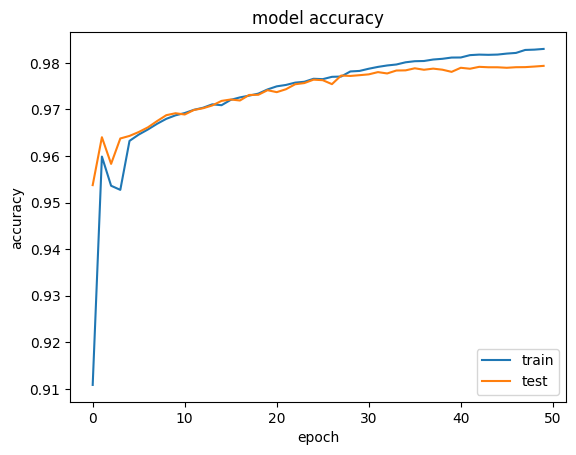

In [47]:
import matplotlib.pyplot as plt

plt.plot(rnn_training.history['acc'])
plt.plot(rnn_training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()

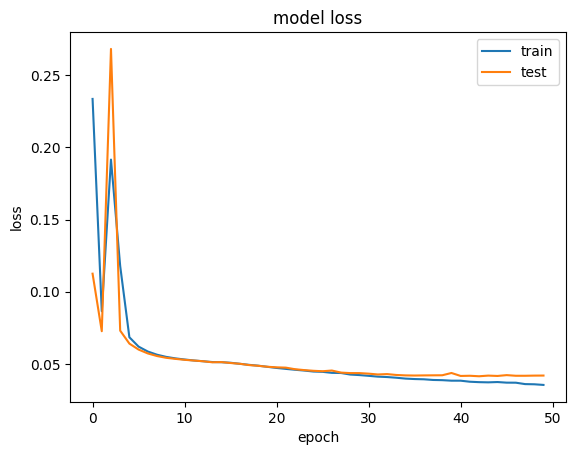

In [48]:
import matplotlib.pyplot as plt

plt.plot(rnn_training.history['loss'])
plt.plot(rnn_training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="upper right")
plt.show()

In [49]:
loss, accuracy = rnn_model.evaluate(X_test, Y_test, verbose = 1)
print("Loss: {0},\nAccuracy: {1}".format(loss, accuracy))

 4/15 [=======>......................] - ETA: 1s - loss: 0.0359 - acc: 0.9820

15/15 [==============================] - 1s 87ms/step - loss: 0.0394 - acc: 0.9804
Loss: 0.039448827505111694,
Accuracy: 0.9803676009178162


In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [51]:
Y_pred_rnn = rnn_model.predict(X_test)

15/15 [==============================] - 2s 90ms/step


In [52]:
Y_pred_rnn_label = []
for pred in Y_pred_rnn:
    rnn_label = np.argmax(pred, axis = 1, out=None)
    Y_pred_rnn_label.append(rnn_label)
Y_pred_rnn_label = np.array(Y_pred_rnn_label)
Y_pred_rnn_label

array([[2, 2, 2, ..., 0, 1, 1],
       [2, 2, 2, ..., 0, 0, 1],
       [2, 2, 2, ..., 1, 1, 1],
       ...,
       [2, 2, 2, ..., 0, 0, 1],
       [2, 2, 2, ..., 1, 1, 0],
       [2, 2, 2, ..., 0, 0, 1]], dtype=int64)

In [53]:
Y_test_rnn_label = []
for test in Y_test:
    label = np.argmax(test, axis = 1, out=None)
    Y_test_rnn_label.append(label)
Y_test_rnn_label = np.array(Y_test_rnn_label)
Y_test_rnn_label

array([[2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 0, 1],
       [2, 2, 2, ..., 1, 1, 1],
       ...,
       [2, 2, 2, ..., 0, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 0, 1]], dtype=int64)

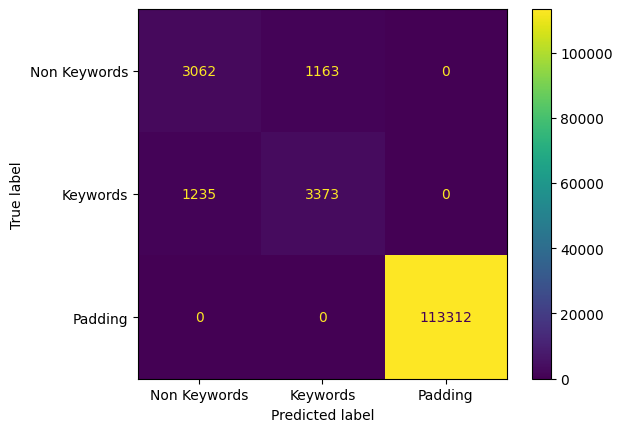

In [54]:
cm = confusion_matrix(Y_test_rnn_label.reshape(-1), Y_pred_rnn_label.reshape(-1))
ConfusionMatrixDisplay(cm, display_labels=['Non Keywords', 'Keywords', 'Padding']).plot()

### Save model

In [67]:
#Save model
rnn_model.save('my_model.keras')

### Load model

In [68]:
import tensorflow as tf
from tensorflow.keras.models import load_model

reconstructed_model = load_model("my_model.keras")
rnn_model = reconstructed_model

## Bi LSTM model

In [57]:
NUM_CLASSES = Y.shape[2]
VOCABULARY_SIZE = len(tokenizer.word_index) + 1
EMBEDDING_SIZE  = 500

### Compile model

In [59]:
# biLstmModel = tf.keras.Sequential()

# biLstmModel.add(tf.keras.Input(shape=(max_length,)))
# biLstmModel.add(tf.keras.layers.Embedding(input_dim=VOCABULARY_SIZE, output_dim=EMBEDDING_SIZE, trainable=False))

# biLstmModel.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)))
# biLstmModel.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,  return_sequences=True)))

# biLstmModel.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')))

# Creating the model 
biLstmModel = tf.keras.Sequential([ 
    tf.keras.Input(shape=(max_length,)),
    tf.keras.layers.Embedding(input_dim=VOCABULARY_SIZE, output_dim=EMBEDDING_SIZE, trainable=False),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)), 
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')),
]) 
biLstmModel.summary()
biLstmModel.compile(loss      =  'categorical_crossentropy',
                    optimizer =  'Adam',
                    metrics   =  ['accuracy'])


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 255, 500)          2011500   
                                                                 
 bidirectional_2 (Bidirecti  (None, 255, 256)          644096    
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 255, 128)          164352    
 onal)                                                           
                                                                 
 time_distributed_4 (TimeDi  (None, 255, 3)            387       
 stributed)                                                      
                                                                 
Total params: 2820335 (10.76 MB)
Trainable params: 808835 (3.09 MB)
Non-trainable params: 2011500 (7.67 MB)
____________

### Train model

In [60]:
with tf.device('/device:GPU:1'):
    EPOCHS=50
    bilstm_training = biLstmModel.fit(X_train, Y_train, batch_size=64, epochs=EPOCHS, validation_data=(X_validation, Y_validation))

Epoch 1/50


30/30 [==============================] - 55s 2s/step - loss: 0.2021 - accuracy: 0.9093 - val_loss: 0.0736 - val_accuracy: 0.9646
Epoch 2/50
30/30 [==============================] - 41s 1s/step - loss: 0.0626 - accuracy: 0.9655 - val_loss: 0.0556 - val_accuracy: 0.9675
Epoch 3/50
30/30 [==============================] - 42s 1s/step - loss: 0.0535 - accuracy: 0.9688 - val_loss: 0.0520 - val_accuracy: 0.9690
Epoch 4/50
30/30 [==============================] - 43s 1s/step - loss: 0.0517 - accuracy: 0.9696 - val_loss: 0.0513 - val_accuracy: 0.9699
Epoch 5/50
30/30 [==============================] - 53s 2s/step - loss: 0.0511 - accuracy: 0.9696 - val_loss: 0.0512 - val_accuracy: 0.9697
Epoch 6/50
30/30 [==============================] - 45s 1s/step - loss: 0.0508 - accuracy: 0.9700 - val_loss: 0.0507 - val_accuracy: 0.9700
Epoch 7/50
30/30 [==============================] - 43s 1s/step - loss: 0.0506 - accuracy: 0.9704 - val_loss: 0.0499 - val_accuracy: 0.9713
Epoch 8/50
30/30 [=============

### Evaluate model

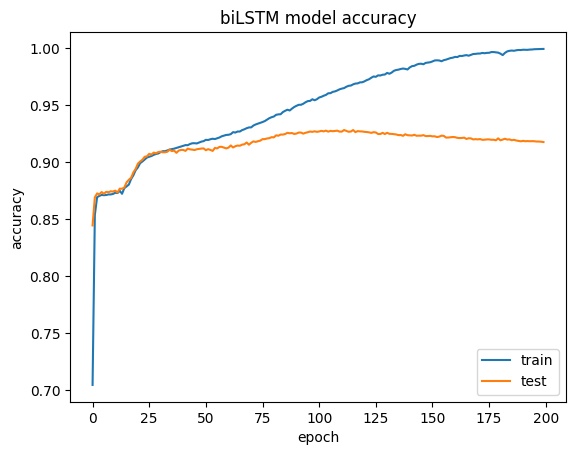

In [167]:
import matplotlib.pyplot as plt

plt.plot(bilstm_training.history['accuracy'])
plt.plot(bilstm_training.history['val_accuracy'])
plt.title('biLSTM model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()

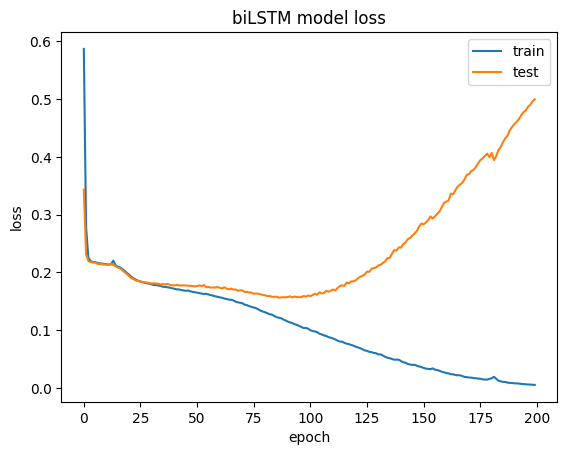

In [168]:
import matplotlib.pyplot as plt

plt.plot(bilstm_training.history['loss'])
plt.plot(bilstm_training.history['val_loss'])
plt.title('biLSTM model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="upper right")
plt.show()

In [61]:
loss_bilstm, accuracy_bilstm = biLstmModel.evaluate(X_test, Y_test, verbose = 1)
print("Loss: {0},\nAccuracy: {1}".format(loss_bilstm, accuracy_bilstm))

 2/15 [===>..........................] - ETA: 3s - loss: 0.0354 - accuracy: 0.9849

15/15 [==============================] - 3s 209ms/step - loss: 0.0367 - accuracy: 0.9838
Loss: 0.03672543168067932,
Accuracy: 0.9838306903839111


In [62]:
Y_pred_biLSTM = biLstmModel.predict(X_test)

15/15 [==============================] - 5s 209ms/step


In [63]:
Y_pred_biLSTM_label = []
for pred in Y_pred_biLSTM:
    biLSTM_label = np.argmax(pred, axis = 1, out=None)
    Y_pred_biLSTM_label.append(biLSTM_label)
Y_pred_biLSTM_label = np.array(Y_pred_biLSTM_label)

Y_test_biLSTM_label = []
for test in Y_test:
    label = np.argmax(test, axis = 1, out=None)
    Y_test_biLSTM_label.append(label)
Y_test_biLSTM_label = np.array(Y_test_biLSTM_label)

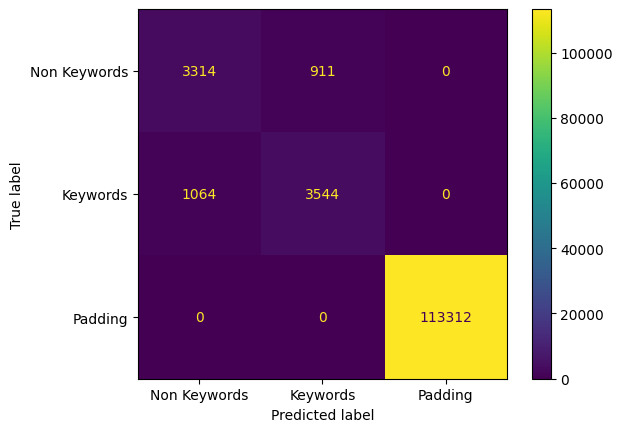

In [64]:
cm = confusion_matrix(Y_test_biLSTM_label.reshape(-1), Y_pred_biLSTM_label.reshape(-1))
ConfusionMatrixDisplay(cm, display_labels=['Non Keywords', 'Keywords', 'Padding']).plot()

### Save model

In [65]:
biLstmModel.save("biLSTM.keras")

### Load model

In [66]:
from tensorflow.keras.models import load_model

reconstructed_biLstmModel = load_model("biLSTM.keras")
biLstmModel = reconstructed_biLstmModel

# 5. Demo prediction

In [69]:
#Load tokenizer
import pickle
from tensorflow.keras.preprocessing.sequence import pad_sequences
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer_load = pickle.load(handle)

In [70]:
#Load model
from tensorflow.keras.models import load_model
reconstructed_biLstmModel = load_model("biLSTM.keras")

In [75]:
text =  ''' 
        Một trong những điểm nổi bật của Reno11 F 5G chính là việc sử dụng con chip MediaTek Dimensity 7050 5G, 
        một con chip mạnh mẽ và hiện đại. 
        Vi xử lý này đảm bảo cho chiếc điện thoại khả năng xử lý tốt các tác vụ đa nhiệm, 
        từ chơi game đến làm việc trên nhiều ứng dụng mà vẫn duy trì hiệu suất ổn định.
        '''
text_pre = preprocess_text(text)
text_pre_token = [text_pre.split()]

max_length = 255
trunc_type='post'

sequences = tokenizer_load.texts_to_sequences(text_pre_token)
input_padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

In [76]:
text_pre

'nổi_bật reno11 f 5 g chip mediatek dimensity 7050 5 g chip mạnh_mẽ hiện_đại_vi điện_thoại khả_năng tác_vụ đa_nhiệm game làm_việc ứng_dụng duy_trì hiệu_suất ổn_định'

In [77]:
input_padded

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [78]:
predict = reconstructed_biLstmModel.predict(input_padded)

1/1 [==============================] - 2s 2s/step


In [79]:
import numpy as np
label_key_phrases = np.argmax(predict[0],axis=1, out=None)

In [80]:
print(input_padded.shape)
print(predict.shape)
print(label_key_phrases.shape)

(1, 255)
(1, 255, 3)
(255,)


In [81]:
text_rever = tokenizer_load.sequences_to_texts(input_padded)
text_rever

['<OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <O

In [82]:
text_rever_split = text_rever[0].split()

In [83]:
key_phrases = [text_rever_split[i] for i in range(len(label_key_phrases)) if label_key_phrases[i] == 1]

In [84]:
def remove_items(test_list, item): 
    # using filter() + __ne__ to perform the task 
    res = list(filter((item).__ne__, test_list)) 
    return res 

In [85]:
key_phrases = remove_items(key_phrases, '<OOV>')

In [86]:
key_phrases_nonToken = [i.replace("_"," ") for i in key_phrases]

In [87]:
key_phrases_nonToken

['nổi bật',
 'reno11',
 'chip',
 'mediatek',
 'dimensity',
 '7050',
 'chip',
 'mạnh mẽ',
 'điện thoại',
 'game']